In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD THE DATASET

In [60]:
train_df=pd.read_csv(r"C:\Users\fathi\OneDrive\Desktop\ICT\train_ctrUa4K.csv")
test_df=pd.read_csv(r"C:\Users\fathi\OneDrive\Desktop\ICT\test_lAUu6dG.csv")

In [61]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [62]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Explore the dataset

In [63]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [64]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


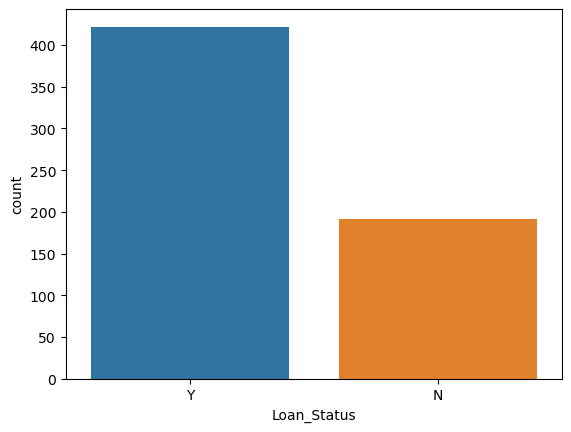

In [65]:
# Visualize the distribution of target variable
sns.countplot(x='Loan_Status', data=train_df)
plt.show()

# pre processing

In [66]:
#CHECK FOR MISSING VALUES
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [67]:
#HANDLE MISSING VALUES

def fill_missing(column_list, strategy, df):
  '''
  Takes column_list, strategy and dataframe as input and fills na values
  with the specified strategy and returns the datafram
  '''
  if strategy=="mode":
    for column in column_list:
      df[column].fillna(df[column].mode()[0],inplace=True)

  if strategy =="median":
    for column in column_list:
      df[column].fillna(df[column].median(), inplace=True)

  #returning the modified df
  return df

In [68]:
train_df = fill_missing(column_list=['Gender','Married','Dependents','Self_Employed',
                                       'Credit_History','Loan_Amount_Term'],
                          strategy="mode",
                          df=train_df)

#filling the numerical column with median
train_df = fill_missing(column_list=['LoanAmount'], strategy="median", df=train_df)
train_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [69]:
train_df.drop('Loan_ID', axis=1, inplace=True)
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [70]:
from sklearn.preprocessing import LabelEncoder
def label_encode(column_list, df):
  for column in column_list:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
  #return the modified df
  return df

In [37]:
train_df = label_encode(column_list=[
    'Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents'
], df=train_df
)
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# scaling

In [71]:
from sklearn.preprocessing import MinMaxScaler
def scaler(df):
  '''
  Takes the dataframe as input
  returns the min max scaled df as output
  '''
  min_max_scaler = MinMaxScaler()
  # min_max_scaler.fit(df)
  scaled_df = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
  # print(scaled_df)
  #returing the scaled_df
  return scaled_df

In [39]:
# Separate features and target variable in train dataset
X_train = train_df.drop('Loan_Status', axis=1)
y_train = train_df['Loan_Status']

X_train = scaler(X_train)
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.172214,0.743590,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0
610,1.0,1.0,1.000000,0.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0
611,1.0,1.0,0.333333,0.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0
612,1.0,1.0,0.666667,0.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,1.0


In [72]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [73]:
test_df.shape

(367, 12)

In [74]:
test_df.isna().sum()     

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [75]:
#handling the missing values in the test dataset
test_df = fill_missing(column_list=['Gender','Dependents','Self_Employed','Credit_History','LoanAmount','Loan_Amount_Term'],
                         strategy="mode",df=test_df)

In [76]:
test_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [77]:
#label encoding the test dataset
test_df = label_encode(column_list=['Gender','Married','Education','Self_Employed','Property_Area','Dependents'],df=test_df)
test_df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [78]:
loan_id = test_df['Loan_ID']
test_df.drop('Loan_ID', axis=1, inplace=True)

test_df = scaler(test_df)
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0.000000,0.0,0.0,0.078865,0.000000,0.157088,0.746835,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.042411,0.062500,0.187739,0.746835,1.0,1.0
2,1.0,1.0,0.666667,0.0,0.0,0.068938,0.075000,0.344828,0.746835,1.0,1.0
3,1.0,1.0,0.666667,0.0,0.0,0.032263,0.106083,0.137931,0.746835,1.0,1.0
4,1.0,0.0,0.000000,1.0,0.0,0.045168,0.000000,0.095785,0.746835,1.0,1.0


In [91]:
def make_submission_file(y_pred, submission_id,id=loan_id):
  
   #Make a csv file from the predictions
    df = pd.DataFrame({'Loan_ID':id,'Loan_Status':y_pred})
    df.Loan_Status=df.Loan_Status.map({0:'N',1:'Y'})
    df.to_csv(f"Submission_{submission_id}.csv", index=False)
    return df

In [92]:
#import the dwcision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_pred=dt_clf.predict(test_df)
sub_df = make_submission_file(y_preds,"001")
sub_df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# Generate the submission file

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_preds = rf_clf.predict(test_df)

sub_df = make_submission_file(y_preds,"002")
sub_df

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
